In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# 1 O_T Approx & Real

/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:1999: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


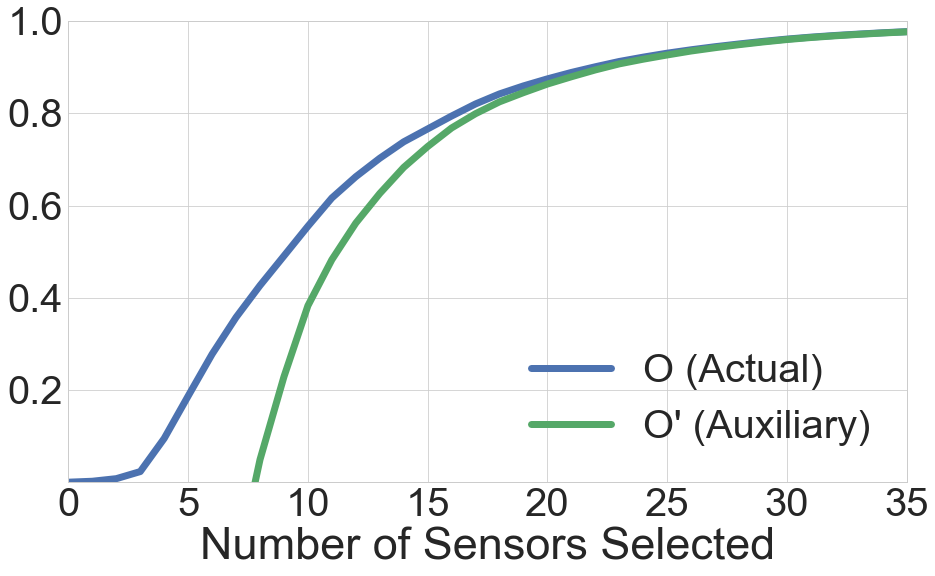

In [16]:
from matplotlib import rcParams
rcParams.update({'figure.autolayout': True})
def_figsize = 56, 20
#rcParams['figure.figsize'] = 28, 20

plt.style.use('seaborn-paper')
sns.set(context='paper', font_scale=1.6)
sns.set_style("whitegrid")
SMALL_SIZE = 40
MEDIUM_SIZE = 40
BIGGER_SIZE = 40
#
plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE) # fontsize of the figure title

df_ot_approx_real = pd.read_csv('plot_data30/Offline_Greedy_30.csv', header=None)

X_approx, Y_approx = df_ot_approx_real[0].tolist(), df_ot_approx_real[1].tolist()
X_real, Y_real = df_ot_approx_real[0].tolist(), df_ot_approx_real[2].tolist()

X_real.insert(0, 0)
Y_real.insert(0, 0)

rcParams['lines.linewidth'] = 7

plt.figure(figsize=(14,9))
#plt.setp(linewidth=4)
plt.plot(X_real, Y_real)
plt.plot(X_approx, Y_approx)

plt.legend(['O (Actual)', 'O\' (Auxiliary)'], prop={'size':40})
plt.xlabel('Number of Sensors Selected', fontsize=45)
plt.ylabel('', fontsize=40)
x_axis = np.arange(0, 40, 5)
plt.xticks(x_axis)
y_axis = np.arange(0.2, 1.1, 0.2)
plt.yticks(y_axis)
plt.xlim([0, 35])
plt.ylim([0, 1])

plt.savefig('plot/ot_real_approx_30.pdf')
plt.show()

# 2 Offline Homo

/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:1999: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


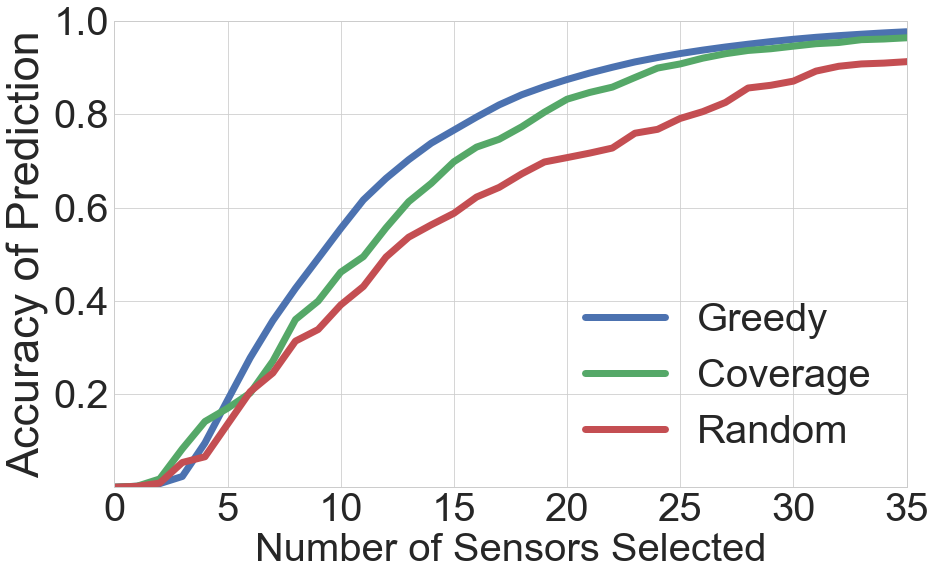

In [11]:
from matplotlib import rcParams
rcParams.update({'figure.autolayout': True})
def_figsize = 56, 20
#rcParams['figure.figsize'] = 28, 20

plt.style.use('seaborn-paper')
sns.set(context='paper', font_scale=1.6)
sns.set_style("whitegrid")
SMALL_SIZE = 40
MEDIUM_SIZE = 40
BIGGER_SIZE = 40
#
plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE) # fontsize of the figure title

df_greedy = pd.read_csv('plot_data30/Offline_Greedy_30.csv', header=None)
df_coverage = pd.read_csv('plot_data30/Offline_Coverage_30.csv', header=None)
df_random = pd.read_csv('plot_data30/Offline_Random_30.csv', header=None)


X_greedy, Y_greedy = df_greedy[0].tolist(), df_greedy[2].tolist()
X_coverage, Y_coverage = df_coverage[0].tolist(), df_coverage[1].tolist()
X_random, Y_random = df_random[0].tolist(), df_random[1].tolist()

X_greedy.insert(0, 0)
Y_greedy.insert(0, 0)
X_coverage.insert(0, 0)
Y_coverage.insert(0, 0)
X_random.insert(0, 0)
Y_random.insert(0, 0)

rcParams['lines.linewidth'] = 7

plt.figure(figsize=(14,9))
#plt.setp(linewidth=4)
plt.plot(X_greedy, Y_greedy)
plt.plot(X_coverage, Y_coverage)
plt.plot(X_random, Y_random)
plt.legend(['Greedy', 'Coverage', 'Random'], prop={'size':40})
plt.xlabel('Number of Sensors Selected', fontsize=40)
plt.ylabel('Accuracy of Prediction', fontsize=45)
x_axis = np.arange(0, 40, 5)
plt.xticks(x_axis)
y_axis = np.arange(0.2, 1.1, 0.2)
plt.yticks(y_axis)
plt.xlim([0, 35])
plt.ylim([0, 1])

plt.savefig('plot/offline_homo_30.pdf')
plt.show()

# 3 Offline Hetero

# 4 Online Homo

/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:1999: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


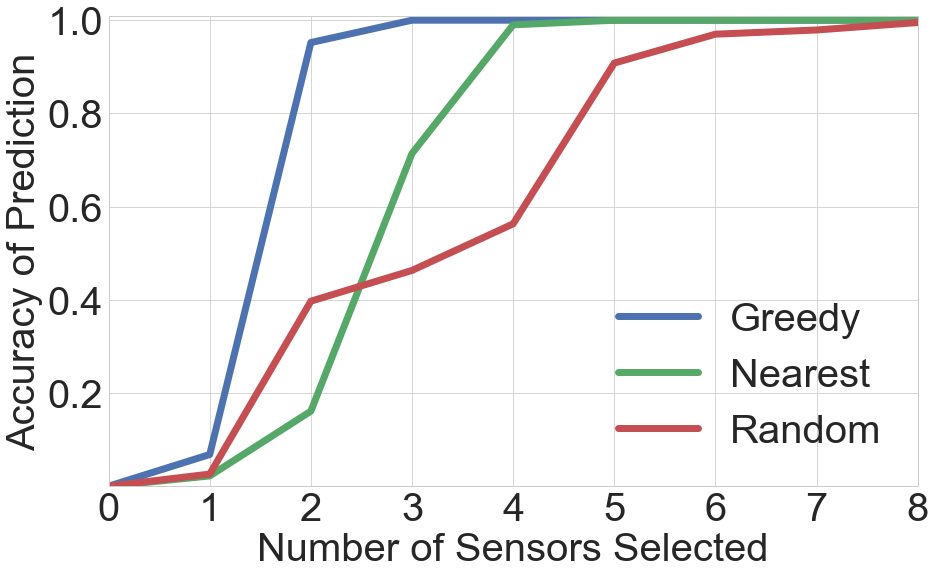

In [18]:
from matplotlib import rcParams
rcParams.update({'figure.autolayout': True})
def_figsize = 56, 20
#rcParams['figure.figsize'] = 28, 20

plt.style.use('seaborn-paper')
sns.set(context='paper', font_scale=1.6)
sns.set_style("whitegrid")
SMALL_SIZE = 40
MEDIUM_SIZE = 40
BIGGER_SIZE = 40
#
plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE) # fontsize of the figure title

df_greedy = pd.read_csv('plot_data30/Online_Greedy_30.csv', header=None)
df_nearest = pd.read_csv('plot_data30/Online_Nearest_30.csv', header=None)
df_random = pd.read_csv('plot_data30/Online_Random_30.csv', header=None)


X_greedy, Y_greedy = df_greedy[0].tolist(), df_greedy[1].tolist()
X_nearest, Y_nearest = df_nearest[0].tolist(), df_nearest[1].tolist()
X_random, Y_random = df_random[0].tolist(), df_random[1].tolist()

X_greedy.insert(0, 0)
Y_greedy.insert(0, 0)
X_nearest.insert(0, 0)
Y_nearest.insert(0, 0)
X_random.insert(0, 0)
Y_random.insert(0, 0)

rcParams['lines.linewidth'] = 7

plt.figure(figsize=(14,9))
#plt.setp(linewidth=4)
plt.plot(X_greedy, Y_greedy)
plt.plot(X_nearest, Y_nearest)
plt.plot(X_random, Y_random)
plt.legend(['Greedy', 'Nearest', 'Random'], prop={'size':40})
plt.xlabel('Number of Sensors Selected', fontsize=40)
plt.ylabel('Accuracy of Prediction', fontsize=40)
x_axis = np.arange(0, 9, 1)
plt.xticks(x_axis)
y_axis = np.arange(0.2, 1.1, 0.2)
plt.yticks(y_axis)
plt.xlim([0, 8])
plt.ylim([0, 1.01])

plt.savefig('plot/online_homo_30.pdf')
plt.show()

# 5 Online Hetero

/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:1999: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


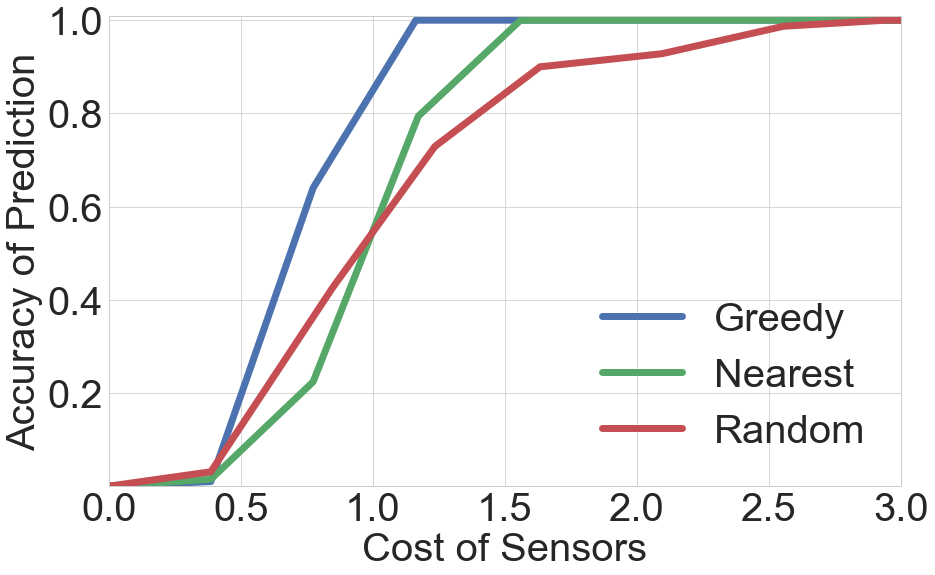

In [8]:
from matplotlib import rcParams
rcParams.update({'figure.autolayout': True})
def_figsize = 56, 20
#rcParams['figure.figsize'] = 28, 20

plt.style.use('seaborn-paper')
sns.set(context='paper', font_scale=1.6)
sns.set_style("whitegrid")
SMALL_SIZE = 40
MEDIUM_SIZE = 40
BIGGER_SIZE = 40
#
plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE) # fontsize of the figure title

df_greedy = pd.read_csv('plot_data30/Online_Greedy_30_hetero.csv', header=None)
df_nearest = pd.read_csv('plot_data30/Online_Nearest_30_hetero.csv', header=None)
df_random = pd.read_csv('plot_data30/Online_Random_30_hetero.csv', header=None)


X_greedy, Y_greedy = df_greedy[0].tolist(), df_greedy[1].tolist()
X_nearest, Y_nearest = df_nearest[0].tolist(), df_nearest[1].tolist()
X_random, Y_random = df_random[0].tolist(), df_random[1].tolist()

X_greedy.insert(0, 0)
Y_greedy.insert(0, 0)
X_nearest.insert(0, 0)
Y_nearest.insert(0, 0)
X_random.insert(0, 0)
Y_random.insert(0, 0)

rcParams['lines.linewidth'] = 7

plt.figure(figsize=(14,9))
#plt.setp(linewidth=4)
plt.plot(X_greedy, Y_greedy)
plt.plot(X_nearest, Y_nearest)
plt.plot(X_random, Y_random)
plt.legend(['Greedy', 'Nearest', 'Random'], prop={'size':40})
plt.xlabel('Cost of Sensors', fontsize=40)
plt.ylabel('Accuracy of Prediction', fontsize=40)
x_axis = np.arange(0, 4, 0.5)
plt.xticks(x_axis)
y_axis = np.arange(0.2, 1.1, 0.2)
plt.yticks(y_axis)
plt.xlim([0, 3])
plt.ylim([0, 1.01])

plt.savefig('plot/online_hetero_30.pdf')
plt.show()